In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

In [52]:
import os

In [53]:
# Get the current working directory
cwd = os.getcwd()
print("Current Working Directory:", cwd)

Current Working Directory: c:\Users\mbray\Desktop\Capstone


In [54]:
# Load dataset (assuming dataset is downloaded as 'paySim.csv')
data = pd.read_csv('C:/Users/mbray/Desktop/Capstone/PS_2017_fraud.csv')

# Show first few rows to understand the structure of the dataset
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [55]:
# Remove unnecessary columns in place
data.drop(columns=['step', 'nameOrig','nameDest', 'isFlaggedFraud'], inplace=True)

# Check the first few rows to confirm the columns were dropped
data.head()


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [56]:
data.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.586670e+05,8.740055e+05,8.938049e+05,9.781600e+05,1.114193e+06,1.089097e-03
std,2.649409e+05,2.971725e+06,3.008246e+06,2.296779e+06,2.416554e+06,3.298351e-02
min,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000e+00


In [57]:
# Rename columns for better clarity
data.rename(columns={
    'oldbalanceOrg': 'originating_balance_before',
    'newbalanceOrig': 'originating_balance_after',
    'oldbalanceDest': 'destination_balance_before',
    'newbalanceDest': 'destination_balance_after',
    'isFraud': 'is_transaction_fraudulent',
}, inplace=True)

# Check the renamed columns
data.head()


,type,amount,originating_balance_before,originating_balance_after,destination_balance_before,destination_balance_after,is_transaction_fraudulent
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [58]:
data.isnull().sum()

type                          0
amount                        0
originating_balance_before    0
originating_balance_after     0
destination_balance_before    0
destination_balance_after     0
is_transaction_fraudulent     0
dtype: int64

In [59]:
data.isna().any()

type                          False
amount                        False
originating_balance_before    False
originating_balance_after     False
destination_balance_before    False
destination_balance_after     False
is_transaction_fraudulent     False
dtype: bool

In [60]:
data.isnull()

,type,amount,originating_balance_before,originating_balance_after,destination_balance_before,destination_balance_after,is_transaction_fraudulent
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False


In [61]:
data.drop_duplicates()

,type,amount,originating_balance_before,originating_balance_after,destination_balance_before,destination_balance_after,is_transaction_fraudulent
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
1048570,CASH_OUT,132557.35,479803.00,347245.65,484329.37,616886.72,0
1048571,PAYMENT,9917.36,90545.00,80627.64,0.00,0.00,0
1048572,PAYMENT,14140.05,20545.00,6404.95,0.00,0.00,0
1048573,PAYMENT,10020.05,90605.00,80584.95,0.00,0.00,0


In [62]:
data['amount'] = data['amount'].fillna(data['amount'].mean())
data['type'] = data['type'].fillna(data['type'].mode()[0])


Feature Engineering

In [63]:
data['balance_change_origin'] = data['originating_balance_after'] - data['originating_balance_before']
data['balance_change_dest'] = data['destination_balance_after'] - data['destination_balance_before']
data['transaction_ratio'] = data['amount'] / data['originating_balance_before']


Encoding Categorical Data

In [64]:
# One-hot encoding for 'type' feature (transaction type)
data = pd.get_dummies(data, columns=['type'], drop_first=True)

#Check first rows
data.head()


,amount,originating_balance_before,originating_balance_after,destination_balance_before,destination_balance_after,is_transaction_fraudulent,balance_change_origin,balance_change_dest,transaction_ratio,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,-9839.64,0.0,0.057834,False,False,True,False
1,1864.28,21249.0,19384.72,0.0,0.0,0,-1864.28,0.0,0.087735,False,False,True,False
2,181.00,181.0,0.00,0.0,0.0,1,-181.00,0.0,1.000000,False,False,False,True
3,181.00,181.0,0.00,21182.0,0.0,1,-181.00,-21182.0,1.000000,True,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,-11668.14,0.0,0.280795,False,False,True,False


In [65]:
# After one-hot encoding, check if the 'type' column is transformed
data.head()


,amount,originating_balance_before,originating_balance_after,destination_balance_before,destination_balance_after,is_transaction_fraudulent,balance_change_origin,balance_change_dest,transaction_ratio,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,-9839.64,0.0,0.057834,False,False,True,False
1,1864.28,21249.0,19384.72,0.0,0.0,0,-1864.28,0.0,0.087735,False,False,True,False
2,181.00,181.0,0.00,0.0,0.0,1,-181.00,0.0,1.000000,False,False,False,True
3,181.00,181.0,0.00,21182.0,0.0,1,-181.00,-21182.0,1.000000,True,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,-11668.14,0.0,0.280795,False,False,True,False


Splitting Data

In [66]:
# Define the features (X) and target (y)
X = data[['amount', 
          'originating_balance_before', 
          'originating_balance_after', 
          'destination_balance_before', 
          'destination_balance_after', 
          'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']]  # All one-hot encoded columns

y = data['is_transaction_fraudulent']


In [67]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (838860, 9)
Testing features shape: (209715, 9)
Training target shape: (838860,)
Testing target shape: (209715,)


In [68]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [69]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])


[[-0.59078472 -0.28713063 -0.29098752 -0.42586264 -0.46115337 -0.7441879
  -0.08280781  1.4022136  -0.30026272]
 [ 0.77573402 -0.27735046 -0.15972746 -0.42586264 -0.46115337 -0.7441879
  -0.08280781 -0.71315811 -0.30026272]
 [-0.5829553  -0.29416781 -0.29718799 -0.42586264 -0.46115337 -0.7441879
  -0.08280781  1.4022136  -0.30026272]
 [ 0.53029734 -0.29389237 -0.19763945 -0.42586264 -0.46115337 -0.7441879
  -0.08280781 -0.71315811 -0.30026272]
 [-0.50247669 -0.29298476 -0.28750668 -0.33028329 -0.38094355 -0.7441879
  -0.08280781 -0.71315811 -0.30026272]]


In [70]:
# Save the training and testing sets as CSV files
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns) 
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)    
# Save the data to CSV
X_train_df.to_csv('X_train.csv', index=False)  
X_test_df.to_csv('X_test.csv', index=False)    
y_train.to_csv('y_train.csv', index=False)      
y_test.to_csv('y_test.csv', index=False)       


## Model Training

Logistic Regression

In [71]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
log_reg_predictions = log_reg.predict(X_test_scaled)

# Model evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.89      0.22      0.36       228

    accuracy                           1.00    209715
   macro avg       0.95      0.61      0.68    209715
weighted avg       1.00      1.00      1.00    209715



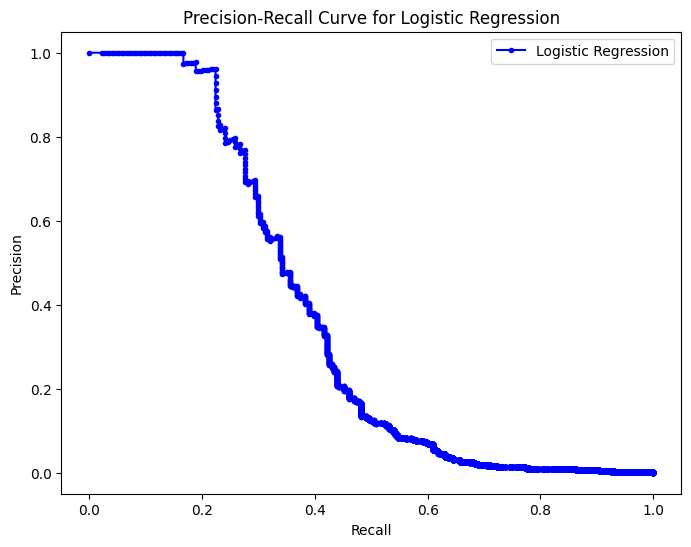

In [72]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='best')
plt.show()


In [73]:
from sklearn.metrics import accuracy_score

# Predict on the test set with Logistic Regression
log_reg_predictions = log_reg.predict(X_test_scaled)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

# Print accuracy
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")


Logistic Regression Accuracy: 0.9991


Random Forest Classifier

In [74]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Predict on the test set
rf_predictions = rf_model.predict(X_test_scaled)


In [75]:
# Model evaluation
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.97      0.62      0.76       228

    accuracy                           1.00    209715
   macro avg       0.98      0.81      0.88    209715
weighted avg       1.00      1.00      1.00    209715



KNN

In [76]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
# Predict on the test set
knn_predictions = knn_model.predict(X_test_scaled)

In [77]:
# Model evaluation
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.89      0.58      0.70       228

    accuracy                           1.00    209715
   macro avg       0.94      0.79      0.85    209715
weighted avg       1.00      1.00      1.00    209715



Neural Network

In [78]:
# Neural Network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_scaled, y_train)
# Predict on the test set
nn_predictions = nn_model.predict(X_test_scaled)

In [79]:
# Model evaluation
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.96      0.46      0.62       228

    accuracy                           1.00    209715
   macro avg       0.98      0.73      0.81    209715
weighted avg       1.00      1.00      1.00    209715



In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [81]:
# Build the neural network model
model = Sequential()

# Input layer (the input shape is determined by the number of features in X_train_scaled)
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # First hidden layer
model.add(Dropout(0.2))  # Dropout for regularization

# Additional hidden layers
model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.2))  # Dropout layer to avoid overfitting

# Output layer (binary classification: fraud vs. non-fraud)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification (fraud or not fraud)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\mbray\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
# Train the model on the training data
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.9989 - loss: 0.0102 - val_accuracy: 0.9992 - val_loss: 0.0045
Epoch 2/10
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 850s 32ms/step - accuracy: 0.9993 - loss: 0.0045 - val_accuracy: 0.9992 - val_loss: 0.0044
Epoch 3/10
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 106s 4ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 4/10
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 149s 4ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9993 - val_loss: 0.0047
Epoch 5/10
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 134s 4ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 6/10
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 110s 4ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 7/10
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 107s 4ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 8/10
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 111s 4ms/step - ac

In [83]:
# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,597 (57.02 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,732 (38.02 KB)

In [84]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")


6554/6554 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9993 - loss: 0.0034
Test Accuracy: 0.9994


## Model Evaluation

Confusion Matrix

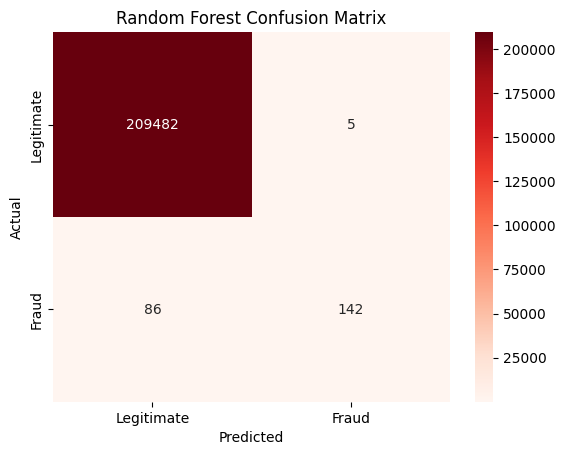

In [85]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Percision, Recall, F1 - Score

In [86]:
# Classification report for Random Forest 
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.97      0.62      0.76       228

    accuracy                           1.00    209715
   macro avg       0.98      0.81      0.88    209715
weighted avg       1.00      1.00      1.00    209715



Random Forest AUC: 0.9708


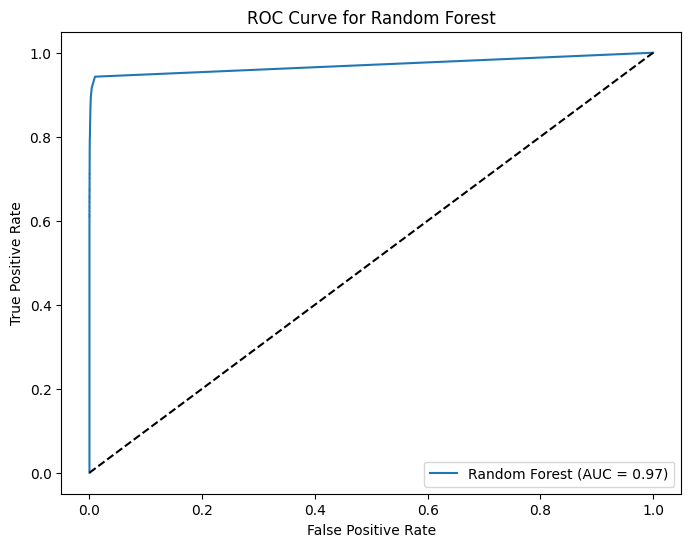

In [87]:
from sklearn.metrics import roc_curve
# ROC Curve and AUC for Random Forest
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
print(f"Random Forest AUC: {rf_auc:.4f}")
# Plot ROC curve for Random Forest
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Cross-Validation for Model Tuning

In [88]:
from sklearn.model_selection import cross_val_score
# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean():.4f}")


Random Forest Cross-Validation Accuracy: 0.9996


In [89]:
print("Random Forest AUC:", rf_auc)

Random Forest AUC: 0.9707738218315939


In [90]:
# Cross-validation for Logistic Regression
cv_scores_lr = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_lr.mean():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.9991


In [91]:
print("Logistic Regression AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))

Logistic Regression AUC: 0.94947785563715


In [92]:
# Cross-validation for KNN
cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"KNN Cross-Validation Accuracy: {cv_scores_knn.mean():.4f}")

KNN Cross-Validation Accuracy: 0.9995


In [93]:
print("KNN AUC:", roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1]))

KNN AUC: 0.8461637467936503


In [94]:
# Cross-validation for Neural Network
cv_scores_nn = cross_val_score(nn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Neural Network Cross-Validation Accuracy: {cv_scores_nn.mean():.4f}")

Neural Network Cross-Validation Accuracy: 0.9994


In [95]:
print("Neural Network AUC:", roc_auc_score(y_test, nn_model.predict_proba(X_test_scaled)[:, 1]))


Neural Network AUC: 0.9836043504437197


## Feature importance

In [96]:
# Get feature importance from the trained random forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame with the feature names and their corresponding importance scores
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                      Feature  Importance
1  originating_balance_before    0.271131
4   destination_balance_after    0.268549
0                      amount    0.253065
3  destination_balance_before    0.130316
2   originating_balance_after    0.031514
8               type_TRANSFER    0.024823
5               type_CASH_OUT    0.019701
7                type_PAYMENT    0.000666
6                  type_DEBIT    0.000235


In [97]:
# Get the coefficients from the logistic regression model
log_reg_coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sort the coefficients by magnitude
log_reg_coeffs['Abs_Coefficient'] = log_reg_coeffs['Coefficient'].abs()
log_reg_coeffs = log_reg_coeffs.sort_values(by='Abs_Coefficient', ascending=False)
print(log_reg_coeffs)


                      Feature  Coefficient  Abs_Coefficient
1  originating_balance_before    12.172603        12.172603
2   originating_balance_after   -10.669713        10.669713
5               type_CASH_OUT     8.881259         8.881259
4   destination_balance_after    -5.621017         5.621017
8               type_TRANSFER     5.508148         5.508148
3  destination_balance_before     3.679944         3.679944
7                type_PAYMENT    -2.571972         2.571972
0                      amount     0.381971         0.381971
6                  type_DEBIT    -0.327328         0.327328


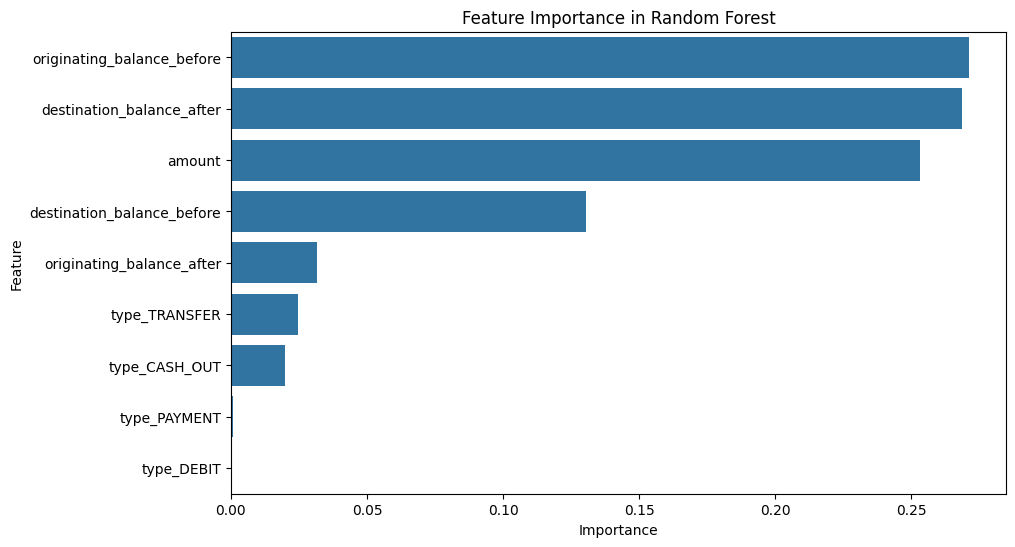

In [98]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


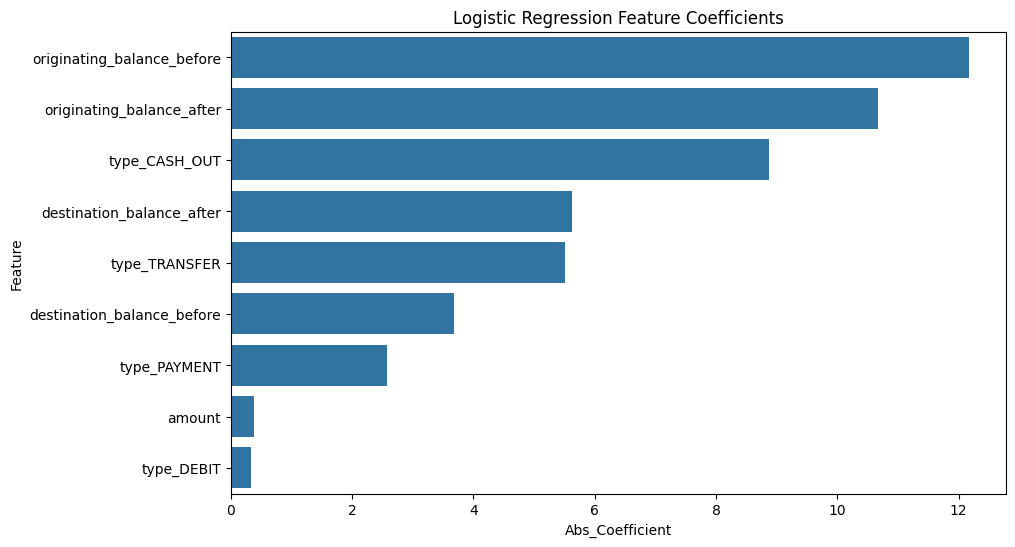

In [99]:
# Plot coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=log_reg_coeffs)
plt.title('Logistic Regression Feature Coefficients')
plt.show()


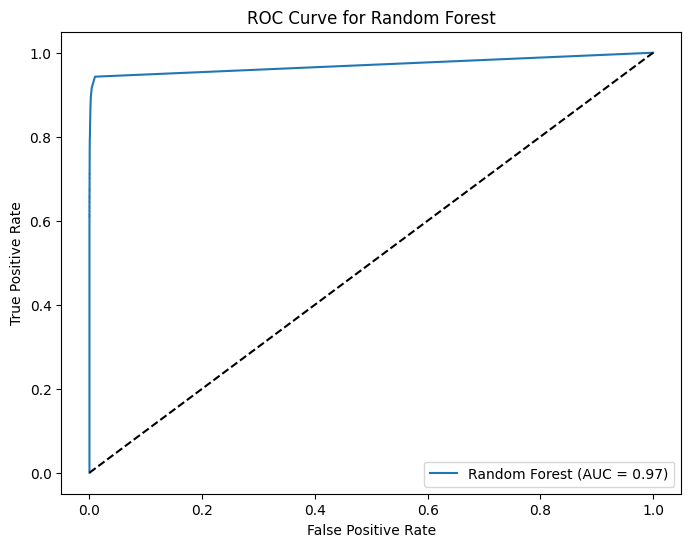

: 

In [ ]:
from sklearn.metrics import roc_curve

# For Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
